# House Price Prediction.
---

### Analysis

After analyzing our dataset called "House Price Prediction Dataset", we concluded that there is no direct correlation or prediction factors between the number of bedrooms a house contains and the price.
  
-This dataset contains a number of 2000 houses with specific ID's, none of which were duplicated. The houses and priced were group d according to the number of bedrooms that were in the hous
e
--The mean price for 1-bedroom houses was $530,
5
--The mean price for 2-bedroom houses was $545,
 6
--The mean price for 3-bedroom houses was $546
,77
--The mean price for 4-bedroom houses was $53
3696
--The mean price for 5-bedroom houses was $
52,500
-Although the average prices for the two and three bedroom houses were slightly higher than all the others, it was not enough to establish a relationship describing that the number of bedrooms for these specific houses provided a higher range of
 rice. 
-On a Pie Chart, the average price percent was calculated and the results were as
 llows:
--One Bedro
o  19.7%
--Two Bedr

s: 20.3%
--Three Bed
rms: 20.3%
--Four Be
doms: 19.8%
--Five B
erooms: 19.8%
-Once again the percentage of each bedroom count set was pretty equally distributed between all the bedroom counts, only showing two and three bedroom house average prices slightly higher than a
l the others. 
-Lastly, the number of houses observed in the dataset per bed
rm count were:
--
O Bedroom:  418
-
-o Bedrooms: 368
--
Tee Bedrooms: 406

-our Bedrooms: 405

-Five Bedrooms: 403
-The number of one-bedroom houses observed was slightly higher than all the others, and the number of two-bedroom houses observed was lower than all the rest of the bedroom count houses. Being that the number of two-bedroom houses observed was lower than all the others and still had an average price that was higher than almost all the bedroom count houses observed, it is still not enough to conclude a correlation between bedroom count and house price. 



In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# House prediction price path defined
house_path = "Resources/House Price Prediction Dataset.csv"


# Read the csv containing the house prediction dataset
house_df = pd.read_csv(house_path)


# Display the data table for preview
house_df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [66]:
# Checking the number of houses.
house_num = house_df["Id"].nunique()
house_num

2000

In [68]:
# Our data should be uniquely identified by House ID, number of bedrooms, location, 
# floors, yearbuilt, condition, and price to make sure there are no duplicates in the data
house_bedroom = house_df.loc[house_df.duplicated(subset=["Id", "Bedrooms", "Location", "Floors", "YearBuilt",
                                                         "Condition", "Price",]),"Id"].unique()
house_bedroom

array([], dtype=int64)

In [70]:
# Create a clean DataFrame by having House Id, number of Bedrooms, Location, Floors, 
# YearBuilt, Condition, and Price as columns
house_bedroom_df = house_df[["Id", "Bedrooms", "Location", "Floors", "YearBuilt",
                             "Condition", "Price"]]
house_bedroom_df.head()

,Id,Bedrooms,Location,Floors,YearBuilt,Condition,Price
0,1,5,Downtown,3,1970,Excellent,149919
1,2,5,Downtown,3,1958,Excellent,424998
2,3,2,Downtown,3,1938,Good,266746
3,4,4,Suburban,2,1902,Fair,244020
4,5,1,Downtown,2,1975,Fair,636056


In [72]:
# Grouping the number of bedrooms per house to see price differences
bedroom_dict = {}

# Loop through each unique bedroom count
for bedroom_count in house_bedroom_df["Bedrooms"].unique():
    # Filter the DataFrame for the current bedroom count
    houses = house_bedroom_df[house_bedroom_df["Bedrooms"] == bedroom_count]
    # Store the house details in the dictionary
    bedroom_dict[bedroom_count] = houses[["Id", "Location", "Floors", "YearBuilt", "Condition", "Price"]]

# Display the results for each bedroom count
for bedroom_count, data in bedroom_dict.items():
    print(f"\nHouses with {bedroom_count} bedrooms:")
    print(data)


Houses with 5 bedrooms:
        Id  Location  Floors  YearBuilt  Condition   Price
0        1  Downtown       3       1970  Excellent  149919
1        2  Downtown       3       1958  Excellent  424998
19      20  Downtown       2       2016  Excellent  218767
24      25     Urban       3       1900  Excellent  688668
25      26     Urban       2       1959       Good  527032
...    ...       ...     ...        ...        ...     ...
1989  1990     Rural       3       1919  Excellent   60002
1995  1996  Suburban       3       1923       Poor  295620
1996  1997  Suburban       1       2019       Poor  580929
1997  1998     Rural       2       1903       Poor  476925
1999  2000  Suburban       3       1903       Fair  482525

[403 rows x 6 columns]

Houses with 2 bedrooms:
        Id  Location  Floors  YearBuilt  Condition   Price
2        3  Downtown       3       1938       Good  266746
7        8  Suburban       1       1925       Good  594893
8        9     Rural       1       1932  

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of bedrooms and prices

# mean, median, variance, standard deviation, and SEM of the prices per bedroom count.
# Assemble the resulting series into a single summary DataFrame.
# Grouping by the number of bedrooms
bedroom_groups = house_bedroom_df.groupby("Bedrooms")["Price"]

# Calculating summary statistics
mean_price = bedroom_groups.mean()
median_price = bedroom_groups.median()
price_variance = bedroom_groups.var()
price_std_dev = bedroom_groups.std()
price_sem = bedroom_groups.sem()

# Creating a summary DataFrame
summary_statistics_df = pd.DataFrame({
    "Mean Price": mean_price,
    "Median Price": median_price, 
    "Price Variance": price_variance,
    "Price Std. Dev.": price_std_dev,
    "Price Std. Err.": price_sem
})

summary_statistics_df

,Mean Price,Median Price,Price Variance,Price Std. Dev.,Price Std. Err.
Bedrooms,,,,,
1,530561.622010,537497.5,7.914835e+10,281333.169201,13760.455102
2,545546.521739,528791.0,7.868252e+10,280504.042087,14622.283994
3,546977.894089,557577.0,7.218170e+10,268666.515802,13333.695299
4,533696.930864,535119.0,8.042240e+10,283588.429642,14091.622362
5,532500.124069,526657.0,7.225753e+10,268807.610292,13390.260835


In [76]:
# Grouping by bedroom count
bedroom_groups = house_bedroom_df.groupby("Bedrooms")["Price"]

# Calculating quartiles
q1 = bedroom_groups.quantile(0.25)
median = bedroom_groups.median()
q3 = bedroom_groups.quantile(0.75)
iqr = q3 - q1

# Creating a DataFrame to display the quartiles and IQR
quartiles_df = pd.DataFrame({
    "1st Quartile": q1,
    "Median": median,
    "3rd Quartile": q3,
    "Interquartile Range (IQR)": iqr
})

quartiles_df


,1st Quartile,Median,3rd Quartile,Interquartile Range (IQR)
Bedrooms,,,,
1,282167.0,537497.5,771193.25,489026.25
2,302971.0,528791.0,798427.00,495456.00
3,317008.0,557577.0,776850.50,459842.50
4,290140.0,535119.0,786091.00,495951.00
5,309730.5,526657.0,762441.50,452711.00


<Figure size 1000x600 with 0 Axes>

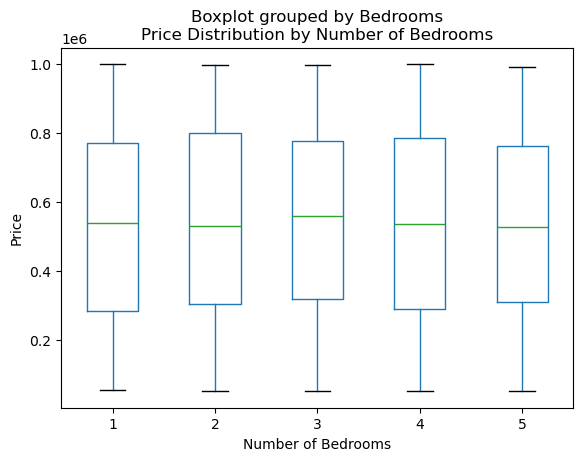

In [78]:
# Plotting a box plot to show price distribution by bedroom count
plt.figure(figsize=(10, 6))
house_bedroom_df.boxplot(column="Price", by="Bedrooms", grid=False)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Bedrooms")
plt.show()

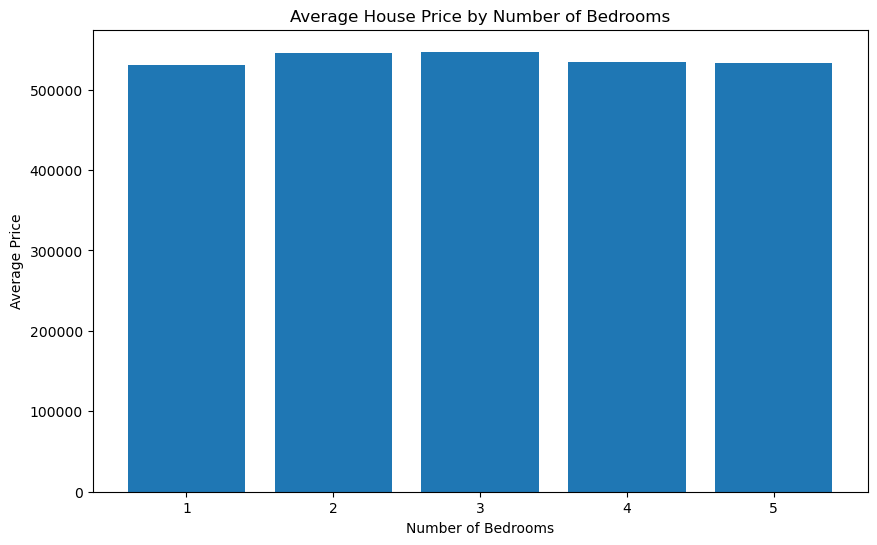

In [80]:
# Calculate the average price by bedroom count
average_prices = house_bedroom_df.groupby("Bedrooms")["Price"].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_prices.index, average_prices.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average House Price by Number of Bedrooms")
plt.show()

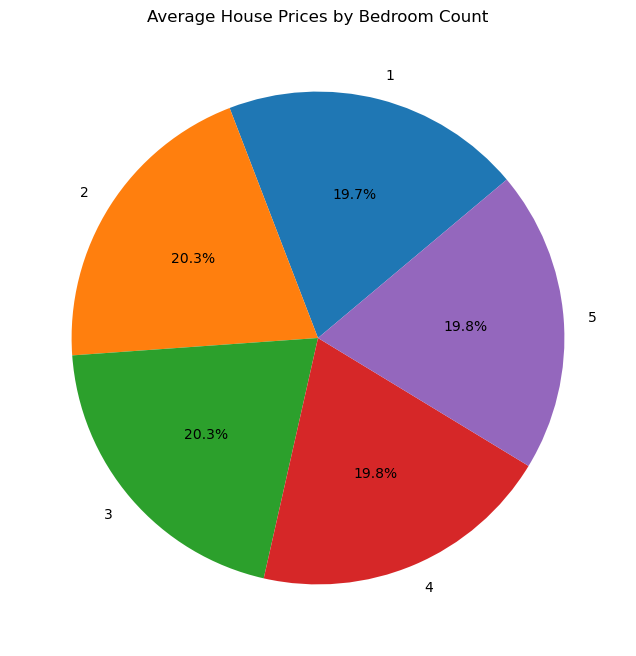

In [90]:
# Calculate the average price by bedroom count
mean_price = house_bedroom_df.groupby("Bedrooms")["Price"].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mean_price, labels=mean_price.index, autopct="%1.1f%%", startangle=40)
plt.title("Average House Prices by Bedroom Count")
plt.show()

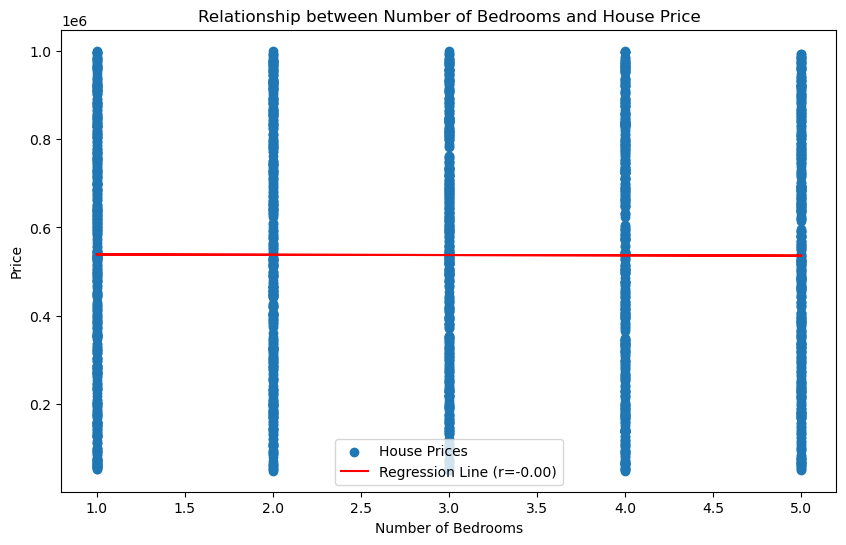

Correlation coefficient (r): -0.00
P-value: 8.77e-01


In [86]:
# Extract bedroom count and price data
bedroom_count = house_bedroom_df["Bedrooms"]
prices = house_bedroom_df["Price"]

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(bedroom_count, prices)
regression_line = slope * bedroom_count + intercept

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(bedroom_count, prices, label="House Prices")
plt.plot(bedroom_count, regression_line, color="red", label=f"Regression Line (r={r_value:.2f})")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Relationship between Number of Bedrooms and House Price")
plt.legend()
plt.show()

# Displaying correlation
print(f"Correlation coefficient (r): {r_value:.2f}")
print(f"P-value: {p_value:.2e}")

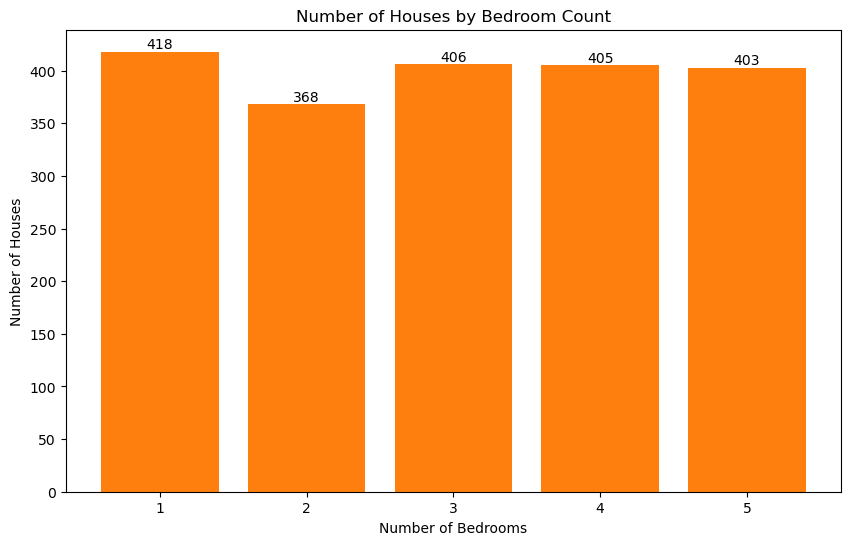

In [94]:
# Count the number of houses observed for each bedroom count
house_counts = house_bedroom_df["Bedrooms"].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(house_counts.index, house_counts.values)

# Add labels to the bars
for bar in bars:
    val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, val, int(val), ha="center", va="bottom")
plt.bar(house_counts.index, house_counts.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
plt.title("Number of Houses by Bedroom Count")
plt.show()